In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestDebug/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fM=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_graz_T*.nc')[0])

In [5]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHYSTRNO3', 'NO3RAD', 'SMS_NO3', 'RIV_NO3', 'RIV_NH4', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'REFRN'])

In [6]:
fD.variables.keys()

dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'depthw', 'depthw_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'BFX_PON', 'BFX_DIAT', 'SMS_DON', 'BSZ_PON'])

In [8]:
np.min(fD.variables['BFX_PON']),np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables['BFX_PON'][0,:,:]))

(-0.00019328127, -0.0)

In [7]:
np.min(fD.variables['BSZ_PON'][1,:,:,:]),np.max(np.ma.masked_where(tmask[:,:,:]==0,fD.variables['BSZ_PON'][1,:,:,:]))

(-0.00031589868, 0.0)

In [7]:
np.min(fD.variables['BSZ_PON'][1,:,:,:]),np.max(np.ma.masked_where(tmask[:,:,:]==0,fD.variables['BSZ_PON'][1,:,:,:]))

(-0.00031589868, 0.0)

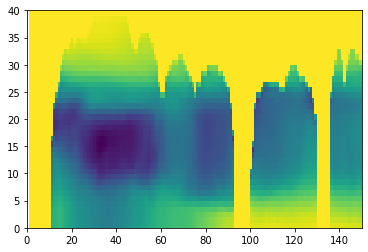

In [12]:
plt.pcolormesh(fD.variables['BSZ_PON'][1,:,500,200:350])

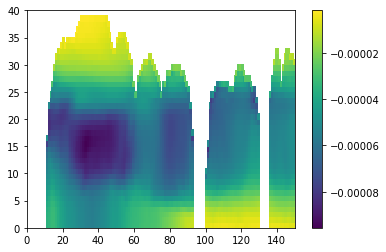

In [14]:
plt.pcolormesh(np.ma.masked_where(tmask[:,500,200:350]==0,fD.variables['BSZ_PON'][1,:,500,200:350]))
plt.colorbar()

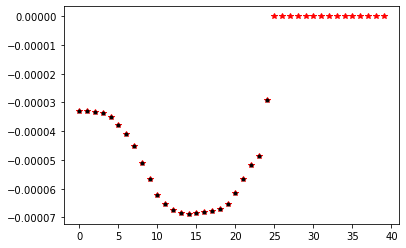

In [19]:
plt.plot(fD.variables['BSZ_PON'][1,:,500,260],'r*')
plt.plot(np.ma.masked_where(tmask[:,500,260]==0,fD.variables['BSZ_PON'][1,:,500,260]),'k.')

In [7]:
fD.variables['BFX_PON']

<class 'netCDF4._netCDF4.Variable'>
float32 BFX_PON(time_counter, y_grid_W, x_grid_W)
    long_name: Bottom Sinking flux
    units: mmol s-1
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area_grid_W
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat_grid_W nav_lon_grid_W
unlimited dimensions: time_counter
current shape = (2, 898, 398)
filling on

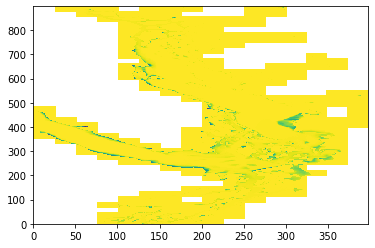

In [9]:
plt.pcolormesh(fD.variables['BFX_DIAT'][-1,:,:])

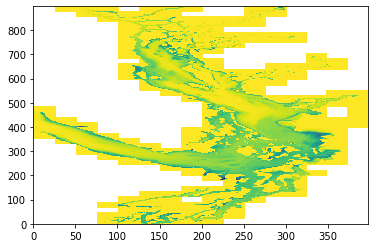

In [10]:
plt.pcolormesh(fD.variables['BFX_PON'][-1,:,:])

In [11]:
np.min(fD.variables['ATF_LIV']),np.max(fD.variables['ATF_LIV'])

(-11.502977, 1e+20)

In [11]:
np.min(fD.variables['ATF_PON']),np.max(fD.variables['ATF_NH4'])

(-2.8757443, 1e+20)

In [12]:
np.min(fD.variables['ATF_NO3']),np.max(fD.variables['ATF_NO3'])

(-2.8757443, 1e+20)

In [13]:
np.min(fD.variables['BFX_PON']),np.max(fD.variables['BFX_DIAT'])

(-0.0, 1e+20)

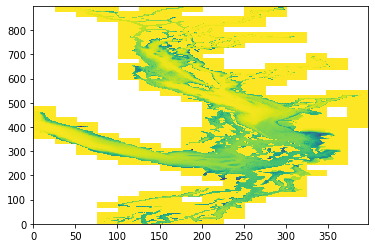

In [12]:
plt.pcolormesh(fD.variables['BFX_PON'][0,:,:])

In [15]:
fM.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'MRU_MYRI', 'MSZ_DIAT', 'MSZ_MYRI', 'MSZ_PHY', 'MSZ_MICZ', 'MSZ_PON', 'MIZ_DIAT', 'MIZ_MYRI', 'MIZ_PHY', 'MIZ_MICZ', 'MIZ_PON'])

In [16]:
np.min(tmaskSOG*fM.variables['MIZ_DIAT']),np.max(tmaskSOG*fM.variables['MIZ_DIAT'])

(-12.258901, 0.0)

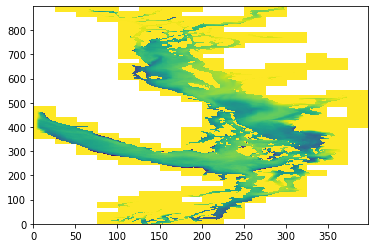

In [17]:
plt.pcolormesh(fM.variables['MIZ_DIAT'][-1,0,:,:])

In [18]:
#allSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NO3'][:,:,:,:],3),2),1)
radSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['NO3RAD'][:,:,:,:],3),2),1)
#no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
smsSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['SMS_NO3'][:,:,:,:],3),2),1)
nitrSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['REM_NO3'][:,:,:,:],3),2),1)
PPSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PRD_NO3'][:,:,:,:],3),2),1)
PPSumNH=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PRD_NH4'][:,:,:,:]),3),2),1)
rivSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['RIV_NO3'][:,:,:,:],3),2),1)
physSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
refrSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['REFRN'][:,:,:,:],3),2),1)

In [19]:
np.min(rivSum),np.max(rivSum)

(48516.04, 49706.383)

In [20]:
np.min(refrSum),np.max(refrSum)

(-7.010294, -6.6515636)

In [21]:
np.max(radSum),np.min(radSum)

(0.0, 0.0)

In [22]:
np.max(afiltSum),np.min(afiltSum)

(-79344.77, -121323.62)

In [23]:
PPSum

masked_array(data=[-1473524.25, -1839533.0],
             mask=[False, False],
       fill_value=1e+20,
            dtype=float32)

In [24]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    malUA=np.sum(np.sum(f.variables['ATX_NO3'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['DTX_NO3'][:,:,:,0],2),1)
    print(f.variables.keys())
    print(np.min(f.variables['ATX_NO3'][:,:,:,0]),np.max(f.variables['ATX_NO3'][:,:,:,0]))
    print(np.min(f.variables['ATX_NH4'][:,:,:,0]),np.max(f.variables['ATX_NH4'][:,:,:,0]))
    print(np.min(f.variables['ATX_LIV'][:,:,:,0]),np.max(f.variables['ATX_LIV'][:,:,:,0]))
    print(np.min(f.variables['DTX_PON'][:,:,:,0]),np.max(f.variables['DTX_PON'][:,:,:,0]))

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthu', 'depthu_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATX_NO3', 'ATX_NH4', 'ATX_PON', 'ATX_DON', 'ATX_LIV', 'DTX_NO3', 'DTX_NH4', 'DTX_PON', 'DTX_DON', 'DTX_LIV'])
-24293.174 17039.28
-1984.0059 1044.0503
-824.3818 598.12213
-1.9143828 2.7806728


In [26]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    harVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [27]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    sjcVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [28]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    rosVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [29]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    sutVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [30]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    disVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

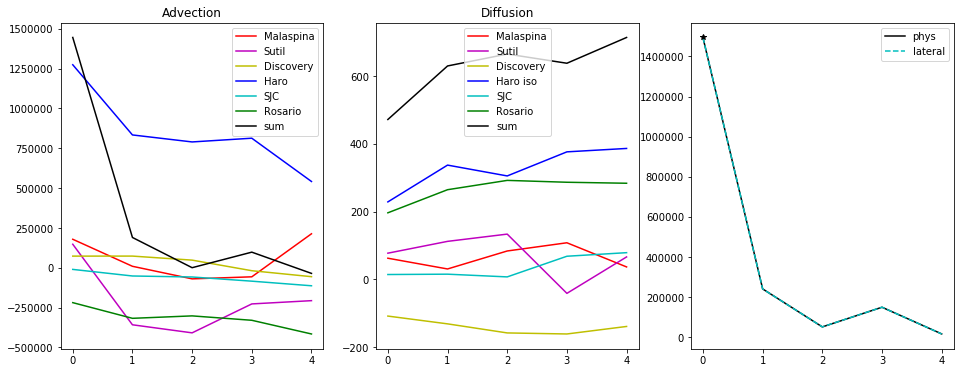

In [31]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),physSum,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif+rivSum,'c--',label='lateral')
#ax[2].plot(range(0,5),adv+dif+rivSum,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSum[0],'k*')
#ax[2].plot(np.arange(0.5,4,1),no3diff,'k--',label='no3diff')
ax[2].legend()

In [32]:
adv[0],dif[0],rivSum[0],adv[0]+dif[0],adv[0]+dif[0]+rivSum[0],physSum[0]

(1445421.1, 471.7424, 48516.04, 1445892.9, 1494408.9, 1493579.0)

In [33]:
## phys difference
adv+dif+rivSum-physSum

masked_array(data=[829.875, -321.109375, 162.30078125, 41.578125,
                   -281.76953125],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [26]:
fk=nc.Dataset(idir+'SalishSea_1d_20150501_20150502_layer6m_W_20150501-20150505.nc')

In [27]:
fk.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'VMIXNO3', 'VMIXNH4', 'VMIXPON', 'VMIXDON', 'VMIXLIV', 'ATZ_NO3', 'ATZ_NH4', 'ATZ_PON', 'ATZ_DON', 'ATZ_LIV'])

In [28]:
fk.variables['VMIXNO3']

<class 'netCDF4._netCDF4.Variable'>
float32 VMIXNO3(time_counter, layer6m_W, y, x)
    long_name: upward flux due to vert mixing with horiz comp
    units: mmol N/m2/s
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (2, 1, 898, 398)
filling on

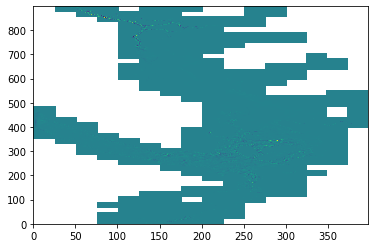

In [30]:
plt.pcolormesh(fk.variables['ATZ_NO3'][-1,0,:,:])

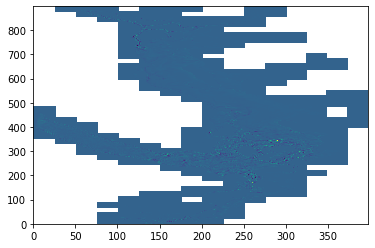

In [31]:
plt.pcolormesh(fk.variables['ATZ_PON'][-1,0,:,:])

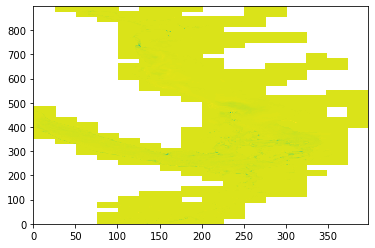

In [32]:
plt.pcolormesh(fk.variables['VMIXLIV'][-1,0,:,:])

In [33]:
fk2=nc.Dataset(idir+'SalishSea_1d_20150501_20150502_layer6m_W_2_20150501-20150505.nc')

In [34]:
fk2.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'WLDFNO3', 'WLDFNH4', 'WLDFPON', 'WLDFDON', 'WLDFLIV', 'BSZ_DIAT', 'BSZ_PON', 'VMIXNO3H'])

In [43]:
np.min(fk.variables['VMIXNO3']),np.max(fk.variables['VMIXNO3'])

(-0.001376849, 1e+20)

In [41]:
np.min(fk2.variables['VMIXNO3H']),np.max(fk2.variables['VMIXNO3H'])

(-7.1974796e-08, 1e+20)

In [42]:
np.min(fk2.variables['WLDFNO3']),np.max(fk2.variables['WLDFNO3'])

(-0.24180576, 1e+20)

In [39]:
np.min(fk2.variables['BSZ_PON']),np.max(fk2.variables['BSZ_PON'])

(-0.00019598802, 1e+20)

In [35]:
np.min(fk2.variables['WLDFNH4']),np.max(fk2.variables['WLDFNH4'])

(-1.2972276, 1e+20)

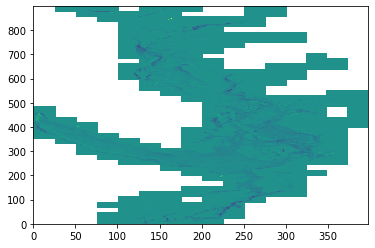

In [37]:
plt.pcolormesh(fk2.variables['WLDFNO3'][-1,0,:,:])

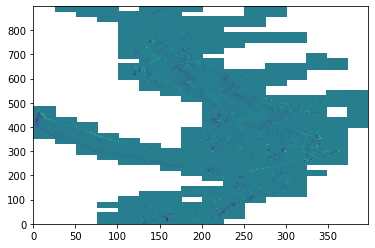

In [38]:
plt.pcolormesh(fk2.variables['WLDFNH4'][-1,0,:,:])

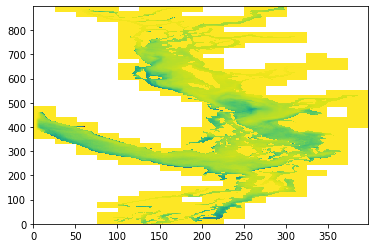

In [40]:
plt.pcolormesh(fk2.variables['BSZ_DIAT'][-1,0,:,:])